In [16]:
import matplotlib.pyplot as plt

from gem.utils import graph_util, plot_util
from gem.evaluation import visualize_embedding as viz
from gem.evaluation import evaluate_graph_reconstruction as gr
from time import time

from gem.embedding.gf       import GraphFactorization
from gem.embedding.hope     import HOPE
from gem.embedding.lap      import LaplacianEigenmaps
from gem.embedding.lle      import LocallyLinearEmbedding
from gem.embedding.node2vec import node2vec
# from gem.embedding.sdne     import SDNE

# File that contains the edges. Format: source target
# Optionally, you can add weights as third column: source target weight
edge_f = 'gem/data/dblp_all_1_deg.edges'
# Specify whether the edges are directed
isDirected = True

# Load graph
G = graph_util.loadGraphFromEdgeListTxt(edge_f, directed=isDirected)
G = G.to_directed()


In [ ]:

models = []
# You can comment out the methods you don't want to run
# models.append(GraphFactorization(d=2, max_iter=100000, eta=1*10**-4, regu=1.0))
# models.append(HOPE(d=4, beta=0.01))
# models.append(LaplacianEigenmaps(d=2))
# models.append(LocallyLinearEmbedding(d=2))
models.append(node2vec(d=500, max_iter=1, walk_len=80, num_walks=10, con_size=10, ret_p=1, inout_p=1))
# models.append(SDNE(d=2, beta=5, alpha=1e-5, nu1=1e-6, nu2=1e-6, K=3,n_units=[50, 15,], rho=0.3, n_iter=50, xeta=0.01,n_batch=500,
#                 modelfile=['./intermediate/enc_model.json', './intermediate/dec_model.json'],
#                 weightfile=['./intermediate/enc_weights.hdf5', './intermediate/dec_weights.hdf5']))

for embedding in models:
    print ('Num nodes: %d, num edges: %d' % (G.number_of_nodes(), G.number_of_edges()))
    t1 = time()
    # Learn embedding - accepts a networkx graph or file with edge list
    Y, t = embedding.learn_embedding(graph=G, edge_f=None, is_weighted=True, no_python=True)
    X = embedding.get_embedding()
    ndarray.dump(open("embedding_"+embedding.get_method_name()+"_500.txt","w"))

    print (embedding._method_name+':\n\tTraining time: %f' % (time() - t1))
    # Evaluate on graph reconstruction
#     MAP, prec_curv, err, err_baseline = gr.evaluateStaticGraphReconstruction(G, embedding, Y, None)
    # Visualize
#     viz.plot_embedding2D(embedding.get_embedding(), di_graph=G, node_colors=None)
#     plt.show()

Num nodes: 5072199, num edges: 10688170


In [29]:
from numpy import ndarray
ndarray.dump(X,open("embedding_"+embedding.get_method_name()+".txt","wb"))


In [30]:
# Confusion Matrix
def plot_confusion_matrix(cm, score):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


In [33]:
# SVM
from sklearn.linear_model import LogisticRegression
def SVM(X_train, y_train, X_test, y_test, C):    
    svm = SVC(C=C)
    svm.fit(X_train, y_train)
    y_train_predicted = svm.predict(X_train)
    y_test_predicted = svm.predict(X_test)
    train_cm = confusion_matrix(y_pred=y_train_predicted, y_true=y_train)
    train_score = svm.score(X_train, y_train)
    test_cm = confusion_matrix(y_pred=y_test_predicted, y_true=y_test)
    test_score = svm.score(X_test, y_test)
    train_average_precision = average_precision_score(y_train, y_train_predicted)
    test_average_precision = precision_score(y_test, y_test_predicted)
    precision, recall, _ = precision_recall_curve(y_test, y_test_predicted)
    test_average_recall = recall_score(y_test, y_test_predicted)
    test_f1_score = f1_score(y_test, y_test_predicted)
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F1-Score: "+str(test_f1_score))
    print("Precision: "+str(test_average_precision))
    print("Recall: "+str(test_average_recall))
    plot_confusion_matrix(test_cm, test_score)
    

In [34]:
# Logistic Regression
def LG(X_train, y_train, X_test, y_test, C):    
    lg = LogisticRegression(C=C)
    lg.fit(X_train, y_train)
    y_train_predicted = lg.predict(X_train)
    y_test_predicted = lg.predict(X_test)
    train_cm = confusion_matrix(y_pred=y_train_predicted, y_true=y_train)
    train_score = lg.score(X_train, y_train)
    test_cm = confusion_matrix(y_pred=y_test_predicted, y_true=y_test)
    test_score = lg.score(X_test, y_test)
    train_average_precision = average_precision_score(y_train, y_train_predicted)
    test_average_precision = precision_score(y_test, y_test_predicted)
    precision, recall, _ = precision_recall_curve(y_test, y_test_predicted)
    test_average_recall = recall_score(y_test, y_test_predicted)
    test_f1_score = f1_score(y_test, y_test_predicted)
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F1-Score: "+str(test_f1_score))
    print("Precision: "+str(test_average_precision))
    print("Recall: "+str(test_average_recall))
    plot_confusion_matrix(test_cm, test_score)
    

In [35]:
# Neural Network
def MLP(X_train, y_train, X_test, y_test):    
    mlp = MLPClassifier(solver='adam', alpha=1e-10, hidden_layer_sizes=(7, 2), random_state=1, activation="relu")
    mlp.fit(X_train, y_train)
    y_train_predicted = mlp.predict(X_train)
    y_test_predicted = mlp.predict(X_test)
    train_cm = confusion_matrix(y_pred=y_train_predicted, y_true=y_train)
    train_score = mlp.score(X_train, y_train)
    test_cm = confusion_matrix(y_pred=y_test_predicted, y_true=y_test)
    test_score = mlp.score(X_test, y_test)
    train_average_precision = average_precision_score(y_train, y_train_predicted)
    test_average_precision = precision_score(y_test, y_test_predicted)
    precision, recall, _ = precision_recall_curve(y_test, y_test_predicted)
    test_average_recall = recall_score(y_test, y_test_predicted)
    test_f1_score = f1_score(y_test, y_test_predicted)
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F1-Score: "+str(test_f1_score))
    print("Precision: "+str(test_average_precision))
    print("Recall: "+str(test_average_recall))
    plot_confusion_matrix(test_cm, test_score)
    

In [58]:
# X = np.array(X)
# y = np.array(y)
X_all = np.load(open("embedding_"+embedding.get_method_name()+".txt","rb"))


In [59]:
import json
pairs = json.load(open("../../dblp/dblp_classification_all.json"))
node_id_to_authors = json.load(open("../../dblp_all_1_authors.nodes"))

X = []
y = []
for pair in pairs:
    a1 = pair[0]
    a2 = pair[1]
    isDup = pair[2]
    X.append(np.hstack((X_all[node_id_to_authors[a1]],X_all[node_id_to_authors[a2]])))
    y.append(isDup)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Precision: [0.33700254 0.70149254 1.        ]
Recall: [1.         0.05904523 0.        ]
F1-Score: 0.10892236384704519
Precision: 0.7014925373134329
Recall: 0.059045226130653265


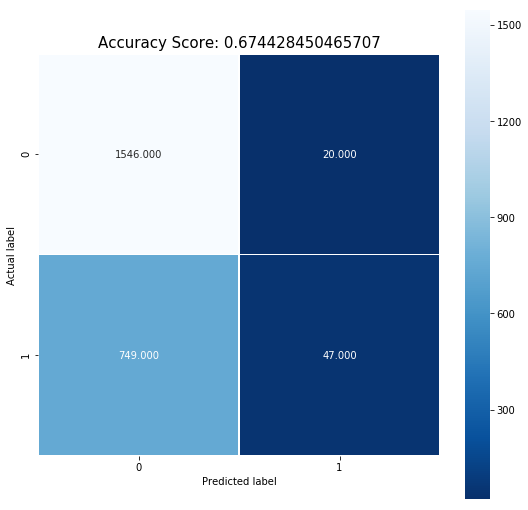

In [63]:
SVM(X_train, y_train, X_test, y_test, 100)

Precision: [0.33700254 0.         1.        ]
Recall: [1. 0. 0.]
F1-Score: 0.0
Precision: 0.0
Recall: 0.0


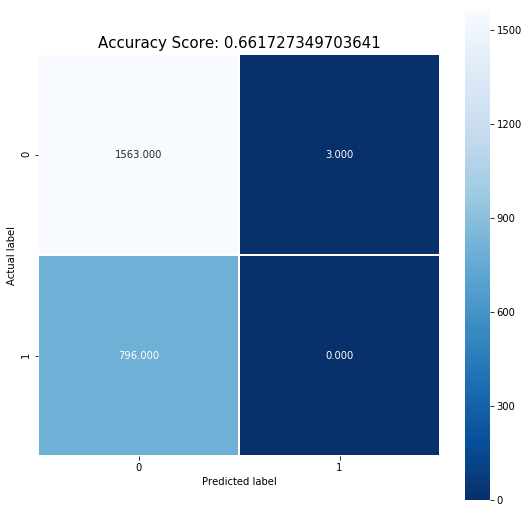

In [64]:
LG(X_train, y_train, X_test, y_test, 10e5)

Precision: [0.33700254 0.60067114 1.        ]
Recall: [1.         0.22487437 0.        ]
F1-Score: 0.3272394881170018
Precision: 0.6006711409395973
Recall: 0.22487437185929648


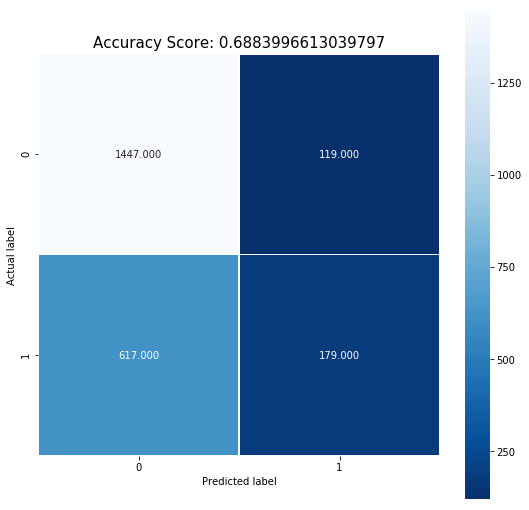

In [65]:
MLP(X_train, y_train, X_test, y_test)